<a href="https://colab.research.google.com/github/machave11/Flight-Price-Prediction/blob/main/Flight_price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
df_train = pd.read_excel('/content/drive/MyDrive/Data_Train.xlsx')

In [77]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [78]:
df_train.shape

(10683, 11)

In [79]:
df_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [80]:
df_train.dtypes


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [81]:
df_train.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


There are 11 columns and all the columns are of object data type except 'Price (in ₹)' which is of integer data type. The total memory usage of this dataset is 918.2 KB.

In [83]:
df_train.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


# Data Cleaning

In [84]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are missing value 'Route' and ' Total stops'


In [85]:
df_train.isnull().sum().sum()

2

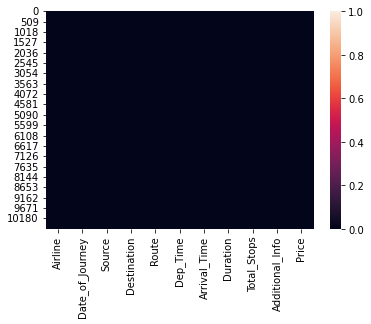

In [86]:
sns.heatmap(df_train.isnull())

# EDA

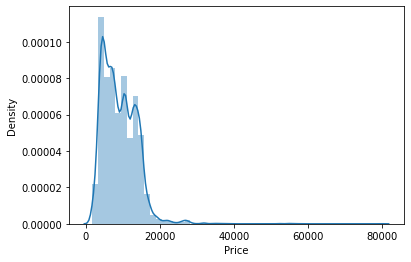

In [87]:
sns.distplot(df_train['Price'])

 The Maximum flight are with in 10000

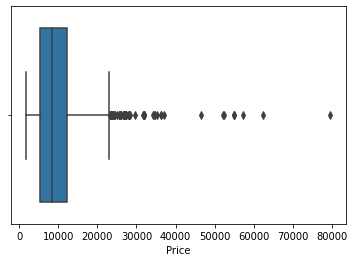

In [88]:
sns.boxplot(df_train['Price'])

In [89]:
df_train['Date_of_Journey'].dtype

dtype('O')

There are few outliers in our target and also it is nearly tightly distributed.

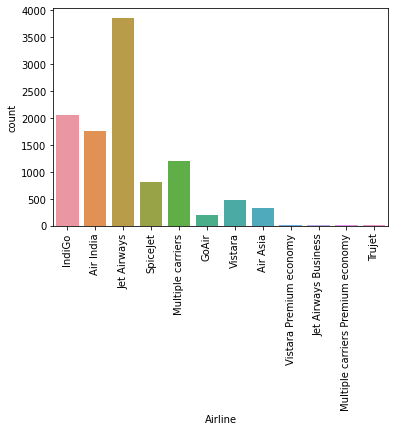

In [90]:
sns.countplot(df_train['Airline'])
plt.xticks(rotation=90)
plt.show()

The Maximum flight are available is Jet airways then IndiGo and Air India

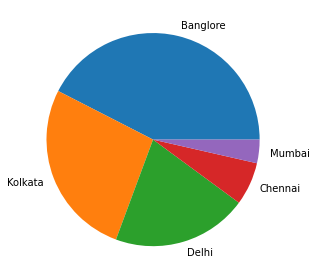

In [91]:
plt.pie(df_train['Source'].value_counts(), labels=df_train['Source'].unique(),shadow=False)
plt.tight_layout()
plt.show()

Banglore and Kolkata have more flights than other source

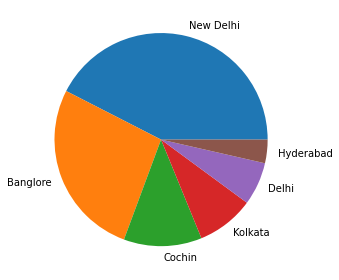

In [92]:
plt.pie(df_train['Destination'].value_counts(), labels=df_train['Destination'].unique(),shadow=False)
plt.tight_layout()
plt.show()

Maximum flight passanger take to mumbai

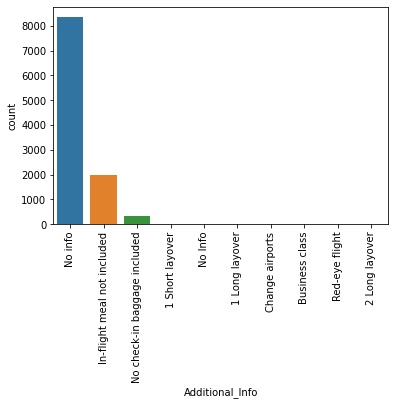

In [93]:
sns.countplot(df_train['Additional_Info'])
plt.xticks(rotation=90)
plt.show()

Only few flights offer free meal and no check-in baggage. There is no additional info fro flights

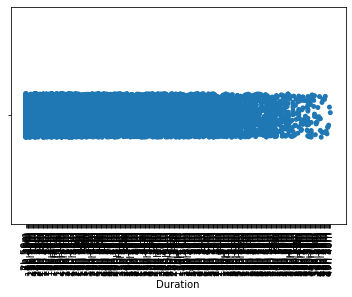

In [94]:
sns.stripplot(df_train['Duration'])
plt.xticks(rotation=90)
plt.show()

 departure time , arrival time and duration have a wide number of unique values in it , hence we will not be performing their Univariate Analysis.

# Baivariate Analysis

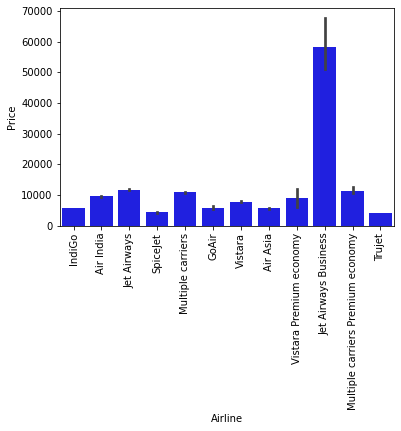

In [95]:
sns.barplot(x=df_train['Airline'], y=df_train['Price'], color = 'blue')
plt.xticks(rotation=90)
plt.show()

The maximum priced airlines is jet airways Business and cheap price is true jet

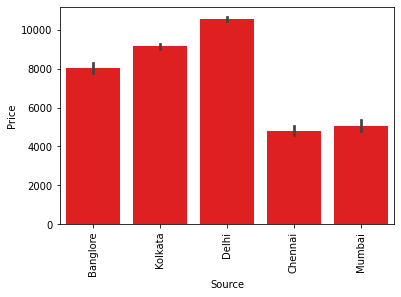

In [96]:
sns.barplot(x=df_train['Source'], y=df_train['Price'],color='red')
plt.xticks(rotation=90)
plt.show()

from Delhi and Kolkata flights are costly

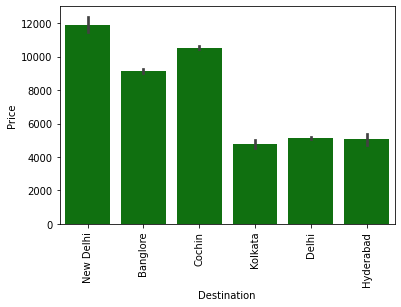

In [97]:
sns.barplot(x=df_train['Destination'], y=df_train['Price'],color='green')
plt.xticks(rotation=90)
plt.show()

 Delhi and Cochin are costly

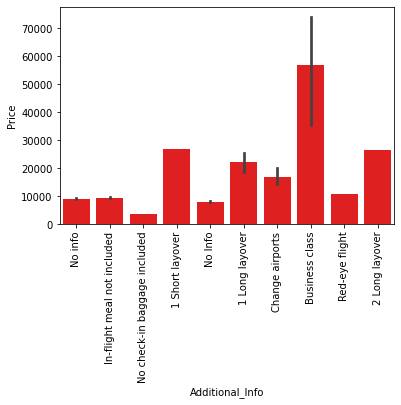

In [98]:
sns.barplot(x=df_train['Additional_Info'],y=df_train['Price'],color='red')
plt.xticks(rotation=90)
plt.show()

Flights that provide a layover are usually costly.
Business class have highest price.
Direct flights fits in budget well as they do not give any additional free meal or layovers.


In [99]:
from sklearn.preprocessing import LabelEncoder
df_train.drop(['Price'],axis=1).astype('category')
le=LabelEncoder()
cnt=0
for col in df_train:
    if df_train[col].dtype=='object':
        le.fit(df_train[col])
        df_train[col] = le.transform(df_train[col])
        cnt += 1
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,4,8,4107
10679,1,29,3,0,64,193,1305,237,4,8,4145
10680,4,29,0,2,18,58,824,280,4,8,7229
10681,10,0,0,5,18,92,938,238,4,8,12648


#Multivariate Analysis

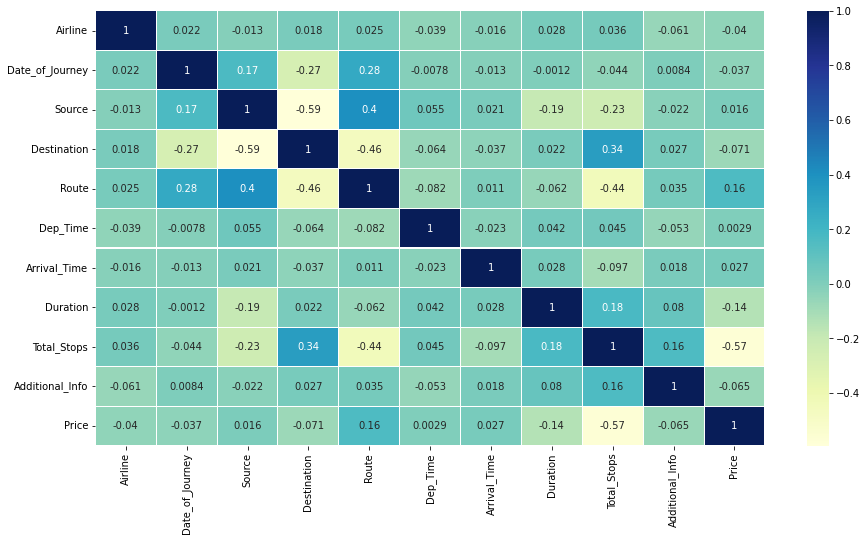

In [100]:
a=df_train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(a,linewidth=0.1, cmap="YlGnBu", annot = True)

There does not exist any multicollinearity in the dataset.

# Model Buildinjg

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score as cvs
import pickle
import warnings
warnings.filterwarnings('ignore')


 seprating feature and target variable into x and y

In [102]:
x = df_train.drop(['Price'], axis=1)
y = df_train['Price']

In [103]:
scale = StandardScaler()
x = scale.fit_transform(x)

In [104]:
# Ridge Regression

In [105]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 45 )
ridge = Ridge(alpha = 0.5)
ridge.fit(xtrain, ytrain)
pred_test_r= ridge.predict(xtest)
print('Ridge Regression Score:',ridge.score(xtrain,ytrain))
print('Ridge Regression r2_score:',r2_score(ytest,pred_test_r))
print("Mean squared error of Ridge Regression:",mean_squared_error(ytest,pred_test_r))
print("Root Mean Square error of Ridge Regression:",np.sqrt(mean_squared_error(ytest,pred_test_r)))

Ridge Regression Score: 0.3576494036435903
Ridge Regression r2_score: 0.3463663592985985
Mean squared error of Ridge Regression: 13796254.376411803
Root Mean Square error of Ridge Regression: 3714.3309459998045


# Elastic Net

In [106]:
EN = ElasticNet(alpha = 0.001)
EN.fit(xtrain, ytrain)
pred_test_EN= EN.predict(xtest)
print('ElasticNet Regression Score:',EN.score(xtrain,ytrain))
print('ElasticNet Regression r2_score:',r2_score(ytest,pred_test_en))
print("Mean squared error of ElasticNet Regression:",mean_squared_error(ytest,pred_test_EN))
print("Root Mean Square error of ElasticNet Regression:",np.sqrt(mean_squared_error(ytest,pred_test_EN)))

ElasticNet Regression Score: 0.35764924919772156
ElasticNet Regression r2_score: 0.34636518206391353
Mean squared error of ElasticNet Regression: 13796279.224320726
Root Mean Square error of ElasticNet Regression: 3714.334290868382


# Decision Tree

In [107]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
pred_train_dtr=dtr.predict(xtrain)
pred_test_dtr=dtr.predict(xtest)
print('Decision Tree Regressor Score:',dtr.score(xtrain,ytrain))
print('Decision Tree Regressor r2_score:',r2_score(ytest,pred_test_dtr))
print("Mean squared error of Decision Tree Regressor:",mean_squared_error(ytest,pred_test_dtr))
print("Root Mean Square error of Decision Tree Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_dtr)))

Decision Tree Regressor Score: 0.9966120795574015
Decision Tree Regressor r2_score: 0.7884134605149316
Mean squared error of Decision Tree Regressor: 4465960.041818339
Root Mean Square error of Decision Tree Regressor: 2113.281817888551


# KNearest Neighbors

In [108]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
pred_train_knr=knr.predict(xtrain)
pred_test_knr=knr.predict(xtest)
print('K Neighbors Regressor Score:',knr.score(xtrain,ytrain))
print('K Neighbors Regressor r2_score:',r2_score(ytest,pred_test_knr))
print("Mean squared error of K Neighbors Regressor:",mean_squared_error(ytest,pred_test_knr))
print("Root Mean Square error of K Neighbors Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_knr)))

K Neighbors Regressor Score: 0.8063189103488826
K Neighbors Regressor r2_score: 0.6947012961765044
Mean squared error of K Neighbors Regressor: 6443944.002358814
Root Mean Square error of K Neighbors Regressor: 2538.4924664766713


# SGD regression

In [109]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
pred_train_sgd=sgd.predict(xtrain)
pred_test_sgd=sgd.predict(xtest)
print('SGD Regressor Score:',sgd.score(xtrain,ytrain))
print('SGD Regressor r2_score:',r2_score(ytest,pred_test_sgd))
print("Mean squared error of SGD Regressor:",mean_squared_error(ytest,pred_test_sgd))
print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_sgd)))

SGD Regressor Score: 0.3564141458525899
SGD Regressor r2_score: 0.3465899320014252
Mean squared error of SGD Regressor: 13791535.424253052
Root Mean Square error of SGD Regressor: 3713.695655846485


# Random Forest

In [110]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
print('Random Regressor Score:', rf.score(xtrain, ytrain))
print('Random Regressor r2_score:', r2_score(ytest,pred_test_rf))
print("Mean squared error of SGD Regressor:",mean_squared_error(ytest,pred_test_sgd))
print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_sgd)))

Random Regressor Score: 0.9814855428536057
Random Regressor r2_score: 0.8126099381720178
Mean squared error of SGD Regressor: 13791535.424253052
Root Mean Square error of SGD Regressor: 3713.695655846485


# Gradient Booting 

In [111]:
gb=GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
pred_train_gb=gb.predict(xtrain)
pred_test_gb=gb.predict(xtest)
print('Gradient Boosting Regressor Score:',gb.score(xtrain,ytrain))
print('Gradient Boosting Regressor r2_score:',r2_score(ytest,pred_test_gb))
print("Mean squared error of Gradient Boosting Regressor:",mean_squared_error(ytest,pred_test_gb))
print("Root Mean Square error of Gradient Boosting Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_gb)))

Gradient Boosting Regressor Score: 0.8470222403420113
Gradient Boosting Regressor r2_score: 0.76557219934938
Mean squared error of Gradient Boosting Regressor: 4948070.860012844
Root Mean Square error of Gradient Boosting Regressor: 2224.425961908565


#Cross Validation Score

In [119]:
print('Cross Validation Score of Ridge is',(cvs(ridge,x,y,cv=5).mean())*100)
print('Cross Validation Score of Elastic Net is',(cvs(en,x,y,cv=5).mean())*100)
print('Cross Validation Score of Decision Tree Regressor is',(cvs(dtr,x,y,cv=5).mean())*100)
print('Cross Validation Score of KNeighbors Regressor is',(cvs(knr,x,y,cv=5).mean())*100)
print('Cross Validation Score of SGD Regressor is',(cvs(sgd,x,y,cv=5).mean())*100)
print('Cross Validation Score of Random Forest Regressor is',(cvs(rf,x,y,cv=5).mean())*100)
print('Cross Validation Score of Gradient Boosting Regressor is',(cvs(gb,x,y,cv=5).mean())*100)

Cross Validation Score of Ridge is 35.26635143195259
Cross Validation Score of Elastic Net is 35.266502766744566
Cross Validation Score of Decision Tree Regressor is 81.12662190110636
Cross Validation Score of KNeighbors Regressor is 71.0951534407178
Cross Validation Score of SGD Regressor is 35.10603689268155
Cross Validation Score of Random Forest Regressor is 86.30285354021886
Cross Validation Score of Gradient Boosting Regressor is 80.5522938093187


# Conclusion: Random Forest and XGBoost Regressors gives us the highest accuracy

---

